## Одномерные нелинейные преобразования

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# генерация набора распределенных данных

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [5]:
np.bincount(X[: ,0]) 

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

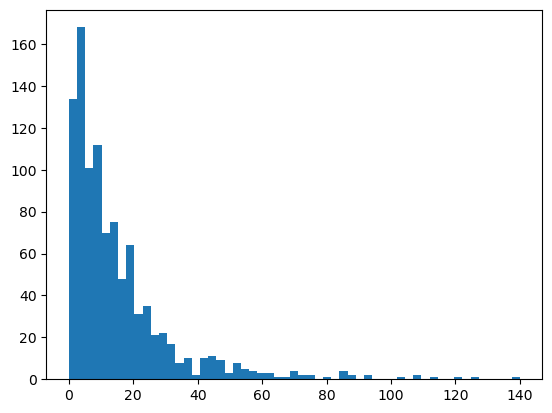

In [8]:
plt.hist(X[:,0], bins=55);

Полученное
распределение значений (высокая частота встречаемости маленьких 
значений и низкая частота встречаемости больших значений) является 
очень распространенным явлением в реальной практике. **Однако для 
большинства линейных моделей оно может представлять трудность**.

In [10]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("R-квадрат на тестовом наборе: {:.3f}".format(score))

R-квадрат на тестовом наборе: 0.622


Видно, что из-за относительно низкого значения R гребневая 
регрессия не может должным образом смоделировать взаимосвязь между 
X и у. **Впрочем, применение логарифмического преобразования может 
помочь**. Поскольку в данных появляется значение 0 (а логарифм 0 не 
определен), мы не можем просто взять и применить log, вместо этого мы 
должны вычислить log(X + 1)

In [11]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Значение')

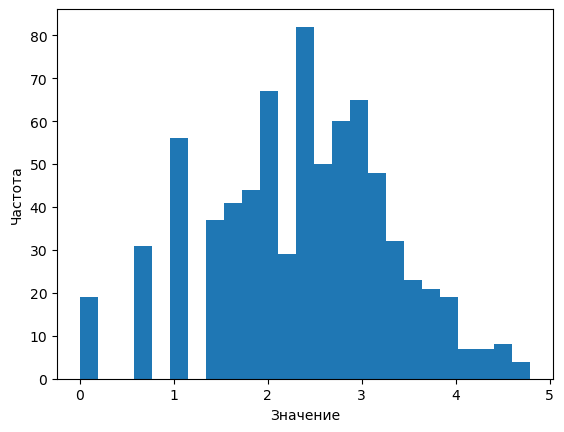

In [17]:
plt.hist(X_train_log[:, 0], bins=25)
plt.ylabel("Частота")
plt.xlabel("Значение")

In [18]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("R-квадрат на тестовом наборе: {:.3f}".format(score))

R-квадрат на тестовом наборе: 0.875


В этом примере все признаки имели одинаковые свойства. 
Такое редко бывает на практике, и как правило, лишь некоторые 
признаки нуждаются в преобразовании, либо в ряде случаев каждый
признак необходимо преобразовывать по-разному. Как мы уже 
упоминали ранее, эти виды преобразований не имеют значения для 
моделей на основе дерева, но могут иметь важное значение для линейных 
моделей. Иногда при построении регрессии целесообразно преобразовать 
зависимую переменную у. Прогнозирование частот (скажем, количества
заказов) является довольно распространенной задачей, и преобразование 
log(у + 1) часто помогает.

## Вместо вывода 

Как вы видели в предыдущих примерах, биннинг, полиномы и 
взаимодействия могут иметь огромное влияние на качество работы 
модели. Особенно это актуально для менее сложных моделей типа
линейных моделей и наивных байесовских моделей. С другой стороны, 
модели на основе дерева, как правило, могут обнаружить важные 
взаимодействия самостоятельно и чаще всего не требуют явного 
преобразования данных. Использование биннинга, взаимодействий и 
полиномов в ряде случаев может положительно сказаться на работе 
моделей типа SVM, ближайших соседей и нейронных сетей, однако 
последствия, возникающие в результате этих преобразований,
представляются менее ясными в отличие от преобразований, 
применяемых в линейных моделях.